In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from datetime import datetime
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import r2_score
from sklearn import preprocessing
from mlxtend.regressor import StackingRegressor
%matplotlib inline 

In [3]:
df = pd.read_csv("deposit_new.csv")

In [4]:
df = df.drop(df.columns[0],axis=1)

In [5]:
X = df.drop(columns = ['amount','time']).values

In [6]:
y = df.amount.values

In [7]:
df.amount.values

array([ 100.,  300.,  300., ...,  200.,  300.,  100.])

In [8]:
y

array([ 100.,  300.,  300., ...,  200.,  300.,  100.])

Create k folds for cross validation

In [9]:
kf = KFold(n_splits=10)

### Linear Regression

Train the dataset and print r2 score

In [10]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = LinearRegression().fit(X_train, y_train)
    y_ = reg.predict(X_test)
    y_pred = reg.predict(X_train)
    print(r2_score(y_train, y_pred),'\t\t\t',r2_score(y_test, y_))
    

0.610285069946 			 0.502808958477
0.595028830774 			 0.664846204087
0.609952144117 			 0.525264308485
0.607700317379 			 0.544920745108
0.601595366648 			 0.598234243458
0.597510894497 			 0.629251710346
0.608952104114 			 0.520206138186
0.591679586289 			 0.685001156767
0.599835396991 			 0.616960964315
0.589860653922 			 0.683298441197


Not too shabby but still not good enough to consider. Looking for a root square mean tending towards 90% +

### Decision Tree

In [11]:
from sklearn import tree

In [12]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = tree.DecisionTreeRegressor(max_depth=1, min_samples_split=2,random_state=0,max_features=5)
    clf.fit(X_train, y_train) 
    
    y_ = clf.predict(X_test)
    y_pred = clf.predict(X_train)
    print(r2_score(y_train, y_pred),'\t\t\t',r2_score(y_test, y_))


0.30280840428 			 0.289913320564
0.297742787533 			 0.343253495006
0.298956386446 			 0.323874420835
0.29930723871 			 0.323116040059
0.311688724046 			 0.225927245105
0.300387784554 			 0.312636540564
0.300095630306 			 0.319036614335
0.300017436266 			 0.31316169721
0.304771350268 			 0.260580969794
0.302897221437 			 0.293128744855


### Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = RandomForestRegressor(max_depth=5, random_state=5,
                                 n_estimators=20)
    clf.fit(X_train, y_train) 
    
    y_ = clf.predict(X_test)
    y_pred = clf.predict(X_train)
    print(r2_score(y_train, y_pred),'\t\t\t',r2_score(y_test, y_))

0.654898989631 			 0.492394904029
0.64248540832 			 0.641822188005
0.648293701977 			 0.55734631037
0.652406650363 			 0.536944446287
0.646632523058 			 0.604634400062
0.645242968908 			 0.590519860981
0.650184931676 			 0.514316474386
0.638116963356 			 0.667788527221
0.643051402346 			 0.620012606715
0.633989782092 			 0.678241173808


### KNN Regressor

In [14]:
from sklearn.neighbors import KNeighborsRegressor

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    neigh = KNeighborsRegressor(n_neighbors=30)
    neigh.fit(X_train, y_train) 
    
    y_ = neigh.predict(X_test)
    y_pred = neigh.predict(X_train)
    print(r2_score(y_train, y_pred),'\t\t\t',r2_score(y_test, y_))

0.608749146136 			 0.521164192113
0.599200317863 			 0.643730610442
0.61240055427 			 0.547533066652
0.610845376389 			 0.552067754802
0.610291806896 			 0.520147275618
0.601538394533 			 0.615551818065
0.611529361041 			 0.511910262871
0.598476128537 			 0.626410486913
0.604737095669 			 0.561042206427
0.595925881404 			 0.646611259035


### Stack Regressor

In [15]:
lr = LinearRegression()
rfr = RandomForestRegressor(max_depth=5, random_state=5,n_estimators=20)
dtr = tree.DecisionTreeRegressor(max_depth=1, min_samples_split=2,max_features=5)
neigh = KNeighborsRegressor(n_neighbors=30)
stregr = StackingRegressor(regressors=[rfr, lr, neigh], 
                           meta_regressor=neigh)

# Training the stacking classifier
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]       
    stregr.fit(X_train, y_train) 
    
    y_ = stregr.predict(X_test)
    y_pred = stregr.predict(X_train)
    print(r2_score(y_train, y_pred),'\t\t\t',r2_score(y_test, y_))



0.654005564396 			 0.516756315441
0.641089828205 			 0.634129571542
0.645941622717 			 0.543215130741
0.644713630949 			 0.543534776254
0.648963827377 			 0.523310767593
0.639306612087 			 0.595324949377
0.647053445803 			 0.510943713352
0.638449225008 			 0.631232649911
0.640397448425 			 0.568552009638
0.633081008455 			 0.649051791638


In [20]:
test_index

array([40302, 40303, 40304, ..., 44776, 44777, 44778])

In [23]:
test_df = df.iloc[test_index]

In [24]:
test_df['predictions'] = y_

In [26]:
test_df

,amount,delta,Prev_Amount,day_of_week,day,hour,time,predictions
40302,50.0,2.021262,100.0,0,4,15,2019-02-04 15:36:19,121.133333
40303,200.0,9.732326,200.0,2,20,8,2019-02-20 08:44:57,202.000000
40304,300.0,20.985880,200.0,3,31,17,2019-01-31 17:39:13,182.966667
40305,100.0,24.559711,50.0,5,9,5,2019-03-09 05:30:18,100.366667
40306,10.0,0.687639,10.0,5,23,8,2019-03-23 08:50:31,39.966667
40307,30.0,2.771678,40.0,5,26,8,2019-01-26 08:15:38,50.633333
40308,100.0,6.343333,150.0,1,19,13,2019-03-19 13:38:13,195.666667
40309,70.0,28.984560,70.0,2,20,19,2019-03-20 19:23:13,100.766667
40310,500.0,17.760752,500.0,6,3,7,2019-03-03 07:51:10,468.666667
40311,300.0,22.560799,350.0,6,10,6,2019-03-10 06:52:38,290.333333


In [33]:
test_df = test_df[['time','amount','predictions']].set_index('time')

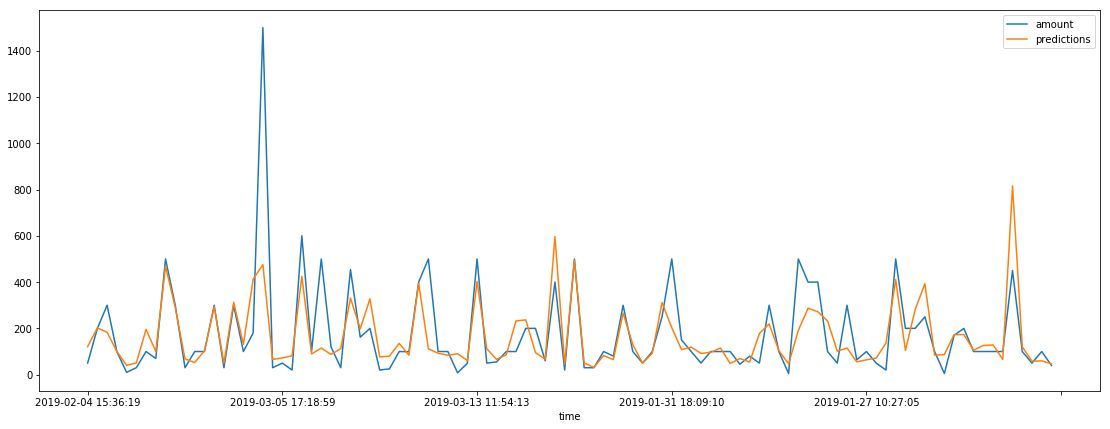

In [37]:
plt.rcParams['figure.figsize']=[19,7]
test_df.head(100).plot()